# Volatility index and associated ETFs explained

In this guide, we'll break down the Volatility Index (VIX) and how to make sense of it. We'll also look at ETFs related to the VIX, like VXX and UVXY, and how they can be used in trading strategies.

## VIX

### What is the VIX?
The Volatility Index (VIX), often referred to is the "fear index" launched in 1993. It represents the market's expectation of volatility (known as implied volatility) over the coming 30 days. 

When the VIX is low, volatility is low. When the VIX is high, volatility is usually a time when the market is gripped by fear.
The VIX generally rises when stocks fall and declines when stocks rise.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


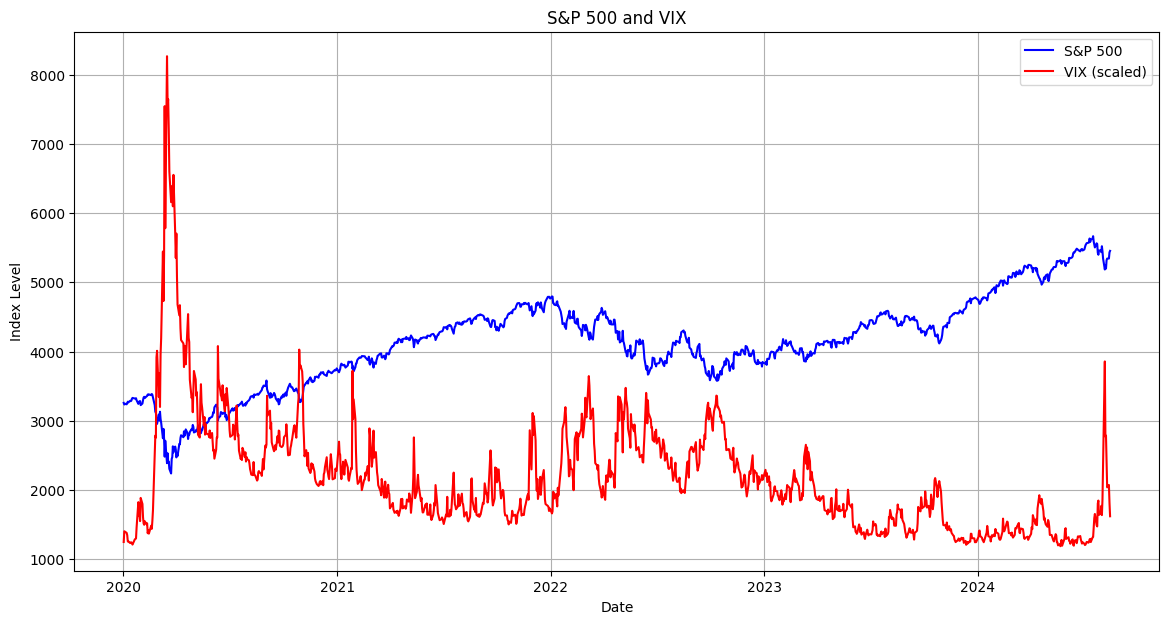

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download historical data for S&P 500 and VIX
sp500_data = yf.download("^GSPC", start="2020-01-01")
vix_data = yf.download("^VIX", start="2020-01-01")

# Align data based on dates
data = pd.DataFrame({
    'S&P 500': sp500_data['Close'],
    'VIX': vix_data['Close']
}).dropna()


# Plot S&P 500 and VIX on the same graph
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['S&P 500'], label='S&P 500', color='blue')
plt.plot(data.index, data['VIX'] * 100, label='VIX (scaled)', color='red')  # Scale VIX for visibility
plt.title(f'S&P 500 and VIX')
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.legend()
plt.grid(True)
plt.show()


### How is the VIX is calculated?
The VIX is interpreted as annualized implied volatility of a hypothetical option on the S&P500 stock index with 30 days to expiration, based on the prices of near-term S&P500 options traded on CBOE.
The VIX is calculated  based on the prices of near-term S&P500 options traded on CBOE with 30 days to expiration – this includes options which expire on the third Friday of every month, and weekly CBOE SPX options that expire every Friday.

The VIX is calculated using the following formula:

$$
\text{VIX} = 100 \times \sqrt{\frac{2}{T} \sum_{i} \frac{\Delta K_i}{K_i^2} e^{RT} Q(K_i) - \frac{1}{T} \left( \frac{F}{K_0} - 1 \right)^2 }
$$

Where:
- $T$ = Time to expiration
- $F$ = Forward index level derived from index option prices
- $K_0$ = First strike below the forward index level $F$
- $\Delta K_i$ = The interval between strike prices
- $K_i$ = Strike price of the $i$ th out-of-the-money option (put if $K_i < F$, call if $K_i > F$)
- $R$ = Risk-free interest rate
- $Q(K_i)$ = Midpoint of the bid-ask spread for each option with strike $K_i$

By combining the weighted prices of multiple S&P 500 put and call options over a wide range of strike prices, we can gain insight into what prices traders are willing to buy and sell the S&P 500 at. These final values will estimate the future volatility of the S&P 500. For example, if the VIX index is 22, it means that a hypothetical S&P500 option with 30 days to expiration has annualized implied volatility of 22%.

The options that qualify for inclusion will be at the money so that they show the general market perception of which strike prices are going to be hit before expiry. This then indicates the wider market sentiment surrounding the direction of the market price.

See below an example of a VIX calculation:

In [7]:
import numpy as np

# Example placeholders for calculation
T = 30 / 365  # Time to expiration (30 days expressed in years)
R = 0.01  # Risk-free rate (1%)
F = 4000  # Forward index level (example value)
K0 = 3950  # Strike price below F
strikes = np.array([3900, 3950, 4000, 4050, 4100])  # Example strike prices
prices = np.array([10, 15, 20, 15, 10])  # Example midpoint option prices

# Calculate ΔK
delta_K = np.diff(strikes)

# Option contribution (simplified)
contributions = (delta_K / strikes[:-1]**2) * np.exp(R * T) * prices[:-1]

# Sum contributions
total_variance = (2 / T) * np.sum(contributions)

# Calculate VIX
vix = 100 * np.sqrt(total_variance)
print(f"Calculated VIX (simplified): {vix:.2f}")


Calculated VIX (simplified): 6.79


### Why the VIX Matters?
Investors use the VIX to measure the level of risk, fear, or stress in the market when making investment decisions.

Discussion on why traders monitor the VIX and its impact on the market.

### How Traders Use the VIX
Example strategies that involve the VIX, such as hedging or volatility trading.

## Understanding VXX
VXX.md: Introduce VXX, the iPath Series B S&P 500 VIX Short-Term Futures ETN.
Subsections:

What is VXX?
Overview of VXX and its role as a short-term futures ETN.

How VXX Tracks the VIX
Explanation of how VXX attempts to track short-term VIX futures.

The Role of Contango and Backwardation
Discuss how these futures market concepts affect the performance of VXX.

Common Trading Strategies Using VXX
Examples of how traders might use VXX in their portfolios, including long and short strategies.

## Understanding UVXY
UVXY.md: Explain what UVXY is, how it works, and its role as a leveraged ETF.
Subsections:

What is UVXY?
Introduction to UVXY as a leveraged ETF that aims to return 1.5x the performance of the S&P 500 VIX Short-Term Futures Index.

How UVXY is Structured
Overview of the underlying assets, rebalancing mechanism, and leverage.

Risks and Rewards
Detailed discussion of the risks associated with holding UVXY, including decay and volatility drag.

Trading Strategies Involving UVXY
Explore specific strategies, such as day trading, hedging, and mean reversion.

# Notes
Figure out what i need to put in the python programs

How is VIX calculated is next